<b>Gradient Descent</b>

In [11]:
from typing import List
Vector = List[float]
def dot(v: Vector, w: Vector) -> float:
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "vectors must be same length"

    return sum(v_i * w_i for v_i, w_i in zip(v, w))

In [12]:
def sum_of_squares(v:Vector) -> float:
    return dot(v,v)

In [13]:
from typing import Callable

def difference_quotient(f:Callable[[float],float],
                        x: float,
                        h: float) ->float:    
    return (f(x+h)-f(x))/h

In [14]:
def square(x:float) -> float:
    return x*x


In [15]:
def derivative(x:float) -> float:
    return 2*x

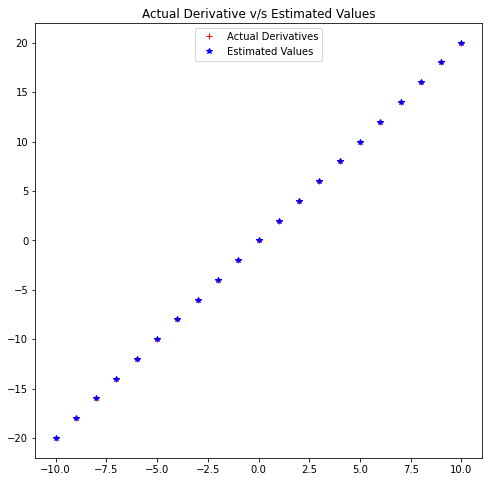

In [16]:
xs = range(-10,11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square,x,h=0.001) for x in xs]

import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.title("Actual Derivative v/s Estimated Values")
plt.plot(xs,actuals,'r+',label="Actual Derivatives")
plt.plot(xs,estimates,'b*',label="Estimated Values")
plt.legend(loc=9)
plt.show()

Many Variables ---- <b>Partial Derivatives</b>

In [17]:
def partial_difference_quotient(f:Callable[[Vector],float],
                                v: Vector,
                                i: int,
                                h: float) -> float:
    w = [v_j+(h if j == i else 0)
       for j,v_j in enumerate(v)]
    return (f(w) - f(v)) / h

In [18]:
def estimate_gradient(f:Callable[[Vector],float],
                       v: Vector,
                       h: float = 0.0001):
    return [partial_difference_quotient(f,v,i,h)
           for i in rnage(len(v))]

<b>Usig the Gradient</b>

In [19]:
def add(v: Vector, w: Vector) -> Vector:
    return [v_i + w_i for v_i, w_i in zip(v, w)]

def scalar_multiply(c: float, v: Vector) -> Vector:
    return [c * v_i for v_i in v]

def distance(v: Vector, w: Vector) -> float:
    return math.sqrt(squared_distance(v, w))

In [20]:
import random
def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

def sum_of_squares_gradient(v:Vector) -> Vector:
    return [2*v_i for v_i in v]

v = [random.uniform(-10,10) for i in range(3)]

for epoch in range(10):
    grad = sum_of_squares_gradient(v)
    v = gradient_step(v, grad, -0.01)
    print(epoch, v)

0 [5.759376182697086, -3.473752796692635, 1.6318501700146153]
1 [5.644188659043144, -3.4042777407587823, 1.599213166614323]
2 [5.531304885862282, -3.336192185943607, 1.5672289032820366]
3 [5.420678788145036, -3.2694683422247346, 1.5358843252163958]
4 [5.312265212382135, -3.20407897538024, 1.505166638712068]
5 [5.2060199081344924, -3.1399973958726353, 1.4750633059378266]
6 [5.101899509971803, -3.0771974479551827, 1.44556203981907]
7 [4.999861519772367, -3.015653498996079, 1.4166507990226886]
8 [4.899864289376919, -2.9553404290161573, 1.3883177830422349]
9 [4.801867003589381, -2.8962336204358343, 1.3605514273813901]


<b>Choosing the Right Step Size</b> -> <i>more of an art than a science</i>

<b>Gradient Descent to Fit Models</b>

In [22]:
inputs = [(x,20 * x+5) for x in range(-50,50)]

In [23]:
def linear_gradient(x:float,y:float,theta:Vector) -> Vector:
    slope,intercept = theta
    predicted = slope * x + intercept
    error = (predicted - y)
    squared_error = error ** 2
    grad = [2 * error * x, 2*error]
    return grad

In [26]:
def vector_mean(vectors: List[Vector]) -> Vector:
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

def vector_sum(vectors: List[Vector]) -> Vector:
    """Sums all corresponding elements"""
    # Check that vectors is not empty
    assert vectors, "no vectors provided!"

    # Check the vectors are all the same size
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), "different sizes!"

    # the i-th element of the result is the sum of every vector[i]
    return [sum(vector[i] for vector in vectors)
            for i in range(num_elements)]

In [28]:
theta = [random.uniform(-1,1),random.uniform(-1,1)]
learning_rate = 0.001
for epoch in range(15):
    grad = vector_mean([linear_gradient(x,y,theta) for x,y in inputs])
    theta = gradient_step(theta,grad,-learning_rate)
    print(epoch,theta)
    
slope, intercept = theta

0 [32.768944413808896, -0.9668544666460104]
1 [11.477147221522824, -0.9421518132989095]
2 [25.678800651430983, -0.938790362450789]
3 [16.206301175133085, -0.9212339810744563]
4 [22.524475882205156, -0.9131852119371743]
5 [18.310261401357224, -0.8988343656310948]
6 [21.1211568109291, -0.8887264354984754]
7 [19.24629968067479, -0.8758278258165494]
8 [20.4968422851641, -0.8648298704842414]
9 [19.66274136592506, -0.8526033684581089]
10 [20.219098905559527, -0.8412354203552677]
11 [19.848019794571442, -0.8293338506089977]
12 [20.09554146317024, -0.8178271631132082]
13 [19.930456016902337, -0.8060959673238116]
14 [20.04057974075882, -0.7945533193722617]


<b>Mini-Batch Gradient Descent </b>

In [29]:
from typing import TypeVar, List, Iterator
T = TypeVar('T') 

def minibatches(dataset: List[T],
                batch_size: int,
                shuffle: bool = True) -> Iterator[List[T]]:
    batch_starts = [start for start in range(0, len(dataset), batch_size)]
    if shuffle: random.shuffle(batch_starts) # shuffle the batches
    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]

In [31]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]
for epoch in range(15):
    for batch in minibatches(inputs, batch_size=20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope , intercept = theta

0 [19.442366849124525, 0.17937771259215868]
1 [20.13985221400082, 0.33851373390703654]
2 [19.95720731623487, 0.36022849438563986]
3 [20.00685564730041, 0.5683869146161209]
4 [19.79309155513511, 0.5844044234426855]
5 [19.807582962197415, 0.7830717798155823]
6 [20.003602475194814, 0.8135493456149984]
7 [20.158978312021784, 0.8576480248121837]
8 [19.849815491768524, 1.0374233986594974]
9 [19.85582847581327, 1.0617795817691433]
10 [19.76577224277261, 1.0707167237261985]
11 [19.99804193718898, 1.097177161770786]
12 [19.070434199641397, 1.1440911673788632]
13 [20.070072485706454, 1.3715343807673048]
14 [19.96376002631425, 1.386162523108193]


<b>Stochastic Gradient Decent</b>

In [33]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]
for epoch in range(15):
    for x, y in inputs:
        grad = linear_gradient(x, y, theta)
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta

0 [20.08738982055853, 0.6504289012797821]
1 [20.083639853040975, 0.8370418807053953]
2 [20.08005138657032, 1.015648448982638]
3 [20.076616874242383, 1.1865921232167718]
4 [20.073329736796794, 1.3502016707595705]
5 [20.070183601548678, 1.506791753067288]
6 [20.06717246701232, 1.6566635314653066]
7 [20.06429051883905, 1.800105246823497]
8 [20.06153220355891, 1.9373927726740219]
9 [20.058892255162544, 2.068790147170838]
10 [20.05636554049442, 2.194550079819815]
11 [20.05394724773175, 2.31491443786529]
12 [20.051632705614203, 2.43011471200704]
13 [20.049417489267622, 2.540372461298794]
14 [20.047297275951337, 2.6458997382979095]
